## Exploratory Data Analysis- Airbnb Listing Price Prediction 

    - Chiranjibi Ghimire

## Table of contents

1. Introduction and project aims

2. The dataset

3. Cleaning and pre-processing

4. Exploratory data analysis
    Numerical features
    Categorical features
    Boolean (true or false) features-features)
5. Preparing the data for modeling

7. Conclusions and recommendations

## Introduction and project aims

Airbnb is a home-sharing platform that allows home-owners and renters ('hosts') to put their properties ('listings') online, so that guests can pay to stay in them. Hosts are expected to set their own prices for their listings. Although Airbnb and other sites provide some general guidance, there are currently no free services which help hosts price their properties. 

Airbnb pricing is important to get right, particularly in big cities like London where there is lots of competition and even small differences in prices can make the difference between optimum occupancy and high earnings, or being priced out of the market. It is also a difficult thing to do correctly, in order to balance the price with occupancy (which varies inversely with price) in order to maximise revenue.

This project aims to use machine learning models to predict the base price for properties, and also to explore Airbnb listing data, in order to help Airbnb hosts maximize their earnings.

## Loading Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from numpy.random import seed
seed(123)
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
import pylab
#from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

Using TensorFlow backend.


In [2]:
Location = "/Users/chiranjibighimire/Desktop/Pathrise/listings.csv"
df = pd.read_csv(Location)

df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


In [3]:
list(df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [4]:
df.shape

(20677, 106)

#### We have 106 total columns in this data set. We need to filter out some less significant columns to predict the price (targeted output).

In [5]:
# Drop columns that are not significant for the data exploration

listings = df[['id','neighbourhood','neighbourhood_cleansed','bedrooms','beds','bed_type','property_type','room_type','accommodates','price','weekly_price', 'monthly_price','has_availability','availability_30','availability_60','availability_90','availability_365','host_since',
    'minimum_nights','cleaning_fee','number_of_reviews','amenities','review_scores_rating','cancellation_policy']]

listings.head()
listings.tail()
listings.shape


(20677, 24)

#### Now we only have 24 columns and 20677 rows which are more significant for data exploration and prediction of price.

In [6]:
listings.head()


,id,neighbourhood,neighbourhood_cleansed,bedrooms,beds,bed_type,property_type,room_type,accommodates,price,...,availability_60,availability_90,availability_365,host_since,minimum_nights,cleaning_fee,number_of_reviews,amenities,review_scores_rating,cancellation_policy
0,2818,Indische Buurt,Oostelijk Havengebied - Indische Buurt,1.0,2.0,Real Bed,Apartment,Private room,2,$59.00,...,18,43,89,2008-09-24,3,$60.00,267,"{Internet,Wifi,""Paid parking off premises"",""Bu...",98.0,strict_14_with_grace_period
1,20168,Grachtengordel,Centrum-Oost,1.0,1.0,Real Bed,Townhouse,Private room,2,$80.00,...,8,34,124,2009-12-02,1,NaN,283,"{TV,Internet,Wifi,""Paid parking off premises"",...",88.0,strict_14_with_grace_period
2,25428,Grachtengordel,Centrum-West,1.0,1.0,Real Bed,Apartment,Entire home/apt,3,$125.00,...,6,16,75,2009-11-20,14,$40.00,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",100.0,strict_14_with_grace_period
3,27886,Westelijke Eilanden,Centrum-West,1.0,1.0,Real Bed,Houseboat,Private room,2,$150.00,...,13,26,66,2010-03-23,2,$0.00,195,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",99.0,strict_14_with_grace_period
4,28871,Amsterdam Centrum,Centrum-West,1.0,1.0,Real Bed,Apartment,Private room,2,$75.00,...,5,12,138,2010-05-13,2,NaN,283,"{Internet,Wifi,""Pets live on this property"",Ca...",97.0,moderate


In [7]:
# checking type of every column in the dataset
listings.dtypes

id                          int64
neighbourhood              object
neighbourhood_cleansed     object
bedrooms                  float64
beds                      float64
bed_type                   object
property_type              object
room_type                  object
accommodates                int64
price                      object
weekly_price               object
monthly_price              object
has_availability           object
availability_30             int64
availability_60             int64
availability_90             int64
availability_365            int64
host_since                 object
minimum_nights              int64
cleaning_fee               object
number_of_reviews           int64
amenities                  object
review_scores_rating      float64
cancellation_policy        object
dtype: object

In [8]:
listings.describe()

,id,bedrooms,beds,accommodates,availability_30,availability_60,availability_90,availability_365,minimum_nights,number_of_reviews,review_scores_rating
count,2.067700e+04,20669.000000,20669.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,17861.00000
mean,1.791013e+07,1.454400,1.829213,2.879335,3.783479,7.686173,12.423321,54.104609,3.546694,23.290323,94.97962
std,1.041987e+07,0.894856,1.407580,1.314935,7.219078,14.491902,22.936166,99.488601,18.690394,48.619730,6.63050
min,2.818000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.00000
25%,9.340207e+06,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,93.00000
50%,1.774427e+07,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,9.000000,97.00000
75%,2.601974e+07,2.000000,2.000000,4.000000,4.000000,8.000000,13.000000,50.000000,3.000000,23.000000,100.00000
max,3.759099e+07,12.000000,32.000000,30.000000,30.000000,60.000000,90.000000,365.000000,1001.000000,767.000000,100.00000


#### After loading the data set, we can see a lot of things. The final 24 columns have lot of informations for deep data exploration we can do on this dataset. The data set has some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.




## Data Cleaning and Pre-processing

#### After looking at the head of the dataset we notice some NaN values, therefore need to examine missing values further before continuing with analysis

1. We need to drop any entries that are missing (NaN) values.
2. We need to convert the format in price from $10.00 into a float of 10.00.
3. We also drop any entries that are inconsistent; i.e. predictors accommodates, bedrooms, beds, or price with a value of 0.


In [9]:
###### Check the missing values for each columns
listings.isnull().sum()

id                            0
neighbourhood               831
neighbourhood_cleansed        0
bedrooms                      8
beds                          8
bed_type                      0
property_type                 0
room_type                     0
accommodates                  0
price                         0
weekly_price              18086
monthly_price             19269
has_availability              0
availability_30               0
availability_60               0
availability_90               0
availability_365              0
host_since                   12
minimum_nights                0
cleaning_fee               3721
number_of_reviews             0
amenities                     0
review_scores_rating       2816
cancellation_policy           1
dtype: int64

In [10]:
### We have 8 columns with missing values (NaN). We need to remove missing values. 

original = len(listings)
listings = listings.dropna(how='any', subset=['neighbourhood','bedrooms','beds', 'host_since','review_scores_rating', 'cancellation_policy'])
print ('Number of NaN values removed:', original - len(listings))


Number of NaN values removed: 3525


In [11]:
# Lets Check if all missing values (NaN) are removed or not?
listings.isnull().sum()

id                            0
neighbourhood                 0
neighbourhood_cleansed        0
bedrooms                      0
beds                          0
bed_type                      0
property_type                 0
room_type                     0
accommodates                  0
price                         0
weekly_price              14764
monthly_price             15843
has_availability              0
availability_30               0
availability_60               0
availability_90               0
availability_365              0
host_since                    0
minimum_nights                0
cleaning_fee               2524
number_of_reviews             0
amenities                     0
review_scores_rating          0
cancellation_policy           0
dtype: int64

#### Since there are lots of missing values in weekly_price and monthly_price columns. We will apply impute methoD instead of removing NaN. 

In [12]:
# Price is in string format with '$'' and ',''. Remove and convert to float
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
listings.weekly_price = listings.weekly_price.replace('[\$,]', '', regex=True).astype(float)
listings.monthly_price = listings.monthly_price.replace('[\$,]', '', regex=True).astype(float)

In [13]:
# Missing values will be replaced with the median (to avoid strange fractions).
for col in ['weekly_price', 'monthly_price']:
    listings[col].fillna(listings[col].median(), inplace=True)

In [14]:
# drop any inconsistent values
print ('Number of Accommodates 0:', len(listings[listings['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(listings[listings['bedrooms'] == 0]))
print ('Number of Beds 0:', len(listings[listings['beds'] == 0]))
print ('Number of Listings with Price 0.00:', len(listings[listings['price'] == 0.00]))

listings = listings[listings['accommodates'] != 0]
listings = listings[listings['bedrooms'] != 0]
listings = listings[listings['beds'] != 0]
listings = listings[listings['price'] != 0.00]


Number of Accommodates 0: 0
Number of Bedrooms 0: 946
Number of Beds 0: 29
Number of Listings with Price 0.00: 1


In [15]:
# Lets check if our data is clean
listings.head()

,id,neighbourhood,neighbourhood_cleansed,bedrooms,beds,bed_type,property_type,room_type,accommodates,price,...,availability_60,availability_90,availability_365,host_since,minimum_nights,cleaning_fee,number_of_reviews,amenities,review_scores_rating,cancellation_policy
0,2818,Indische Buurt,Oostelijk Havengebied - Indische Buurt,1.0,2.0,Real Bed,Apartment,Private room,2,59.0,...,18,43,89,2008-09-24,3,$60.00,267,"{Internet,Wifi,""Paid parking off premises"",""Bu...",98.0,strict_14_with_grace_period
1,20168,Grachtengordel,Centrum-Oost,1.0,1.0,Real Bed,Townhouse,Private room,2,80.0,...,8,34,124,2009-12-02,1,NaN,283,"{TV,Internet,Wifi,""Paid parking off premises"",...",88.0,strict_14_with_grace_period
2,25428,Grachtengordel,Centrum-West,1.0,1.0,Real Bed,Apartment,Entire home/apt,3,125.0,...,6,16,75,2009-11-20,14,$40.00,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",100.0,strict_14_with_grace_period
3,27886,Westelijke Eilanden,Centrum-West,1.0,1.0,Real Bed,Houseboat,Private room,2,150.0,...,13,26,66,2010-03-23,2,$0.00,195,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",99.0,strict_14_with_grace_period
4,28871,Amsterdam Centrum,Centrum-West,1.0,1.0,Real Bed,Apartment,Private room,2,75.0,...,5,12,138,2010-05-13,2,NaN,283,"{Internet,Wifi,""Pets live on this property"",Ca...",97.0,moderate


#### Lets check whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including



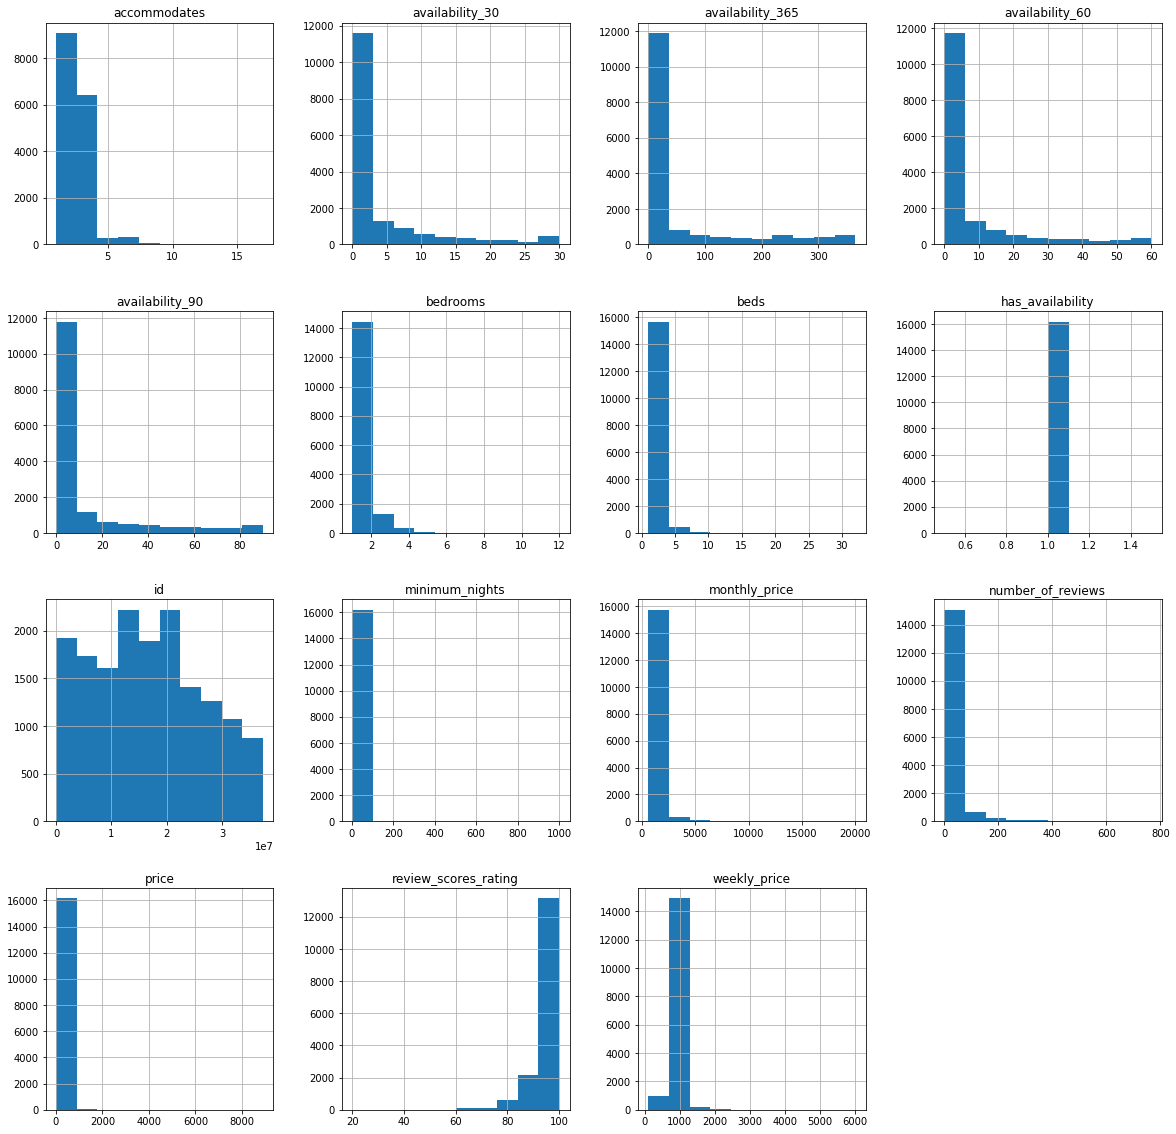

In [16]:
# Replacing columns with f/t with 0/1
listings.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
listings.hist(figsize=(20,20));

#### From the above histogram, it can be seen that one column only contain one category and can be dropped.

In [17]:
listings.drop(['has_availability'], axis=1, inplace=True)

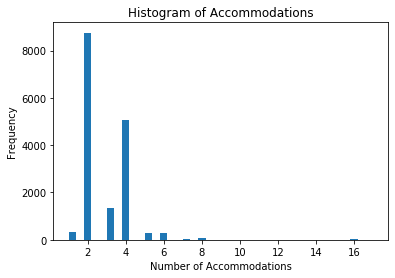

In [18]:
# visualize distribution of price (target variable)
plt.hist(listings['accommodates'], bins=40)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

#### We see that the majority of listings has accomodations for 2-4 peoples.

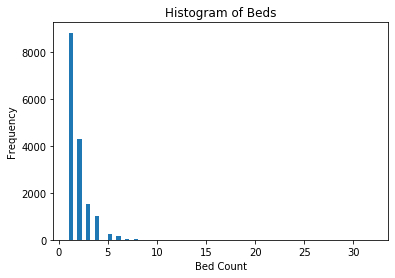

In [19]:
# visualize distribution of beds
plt.hist(listings['beds'], bins=70)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

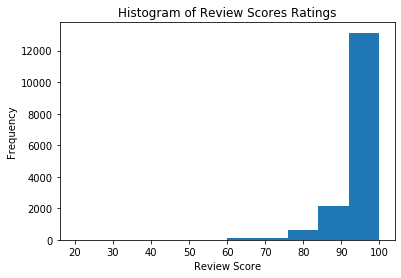

In [20]:
# visualize distribution of review scores ratings
plt.hist(listings['review_scores_rating'][~listings['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

#### Majority of listings are one and two bedroom.

In [21]:
len(listings)


16182

#### Our dataset is now clean and we no longer have any missing values. We have a total of 16182 records from the original 20,677; thus, we've retained a reasonable amount of records. We have a few columns that contain categorical predictors. 

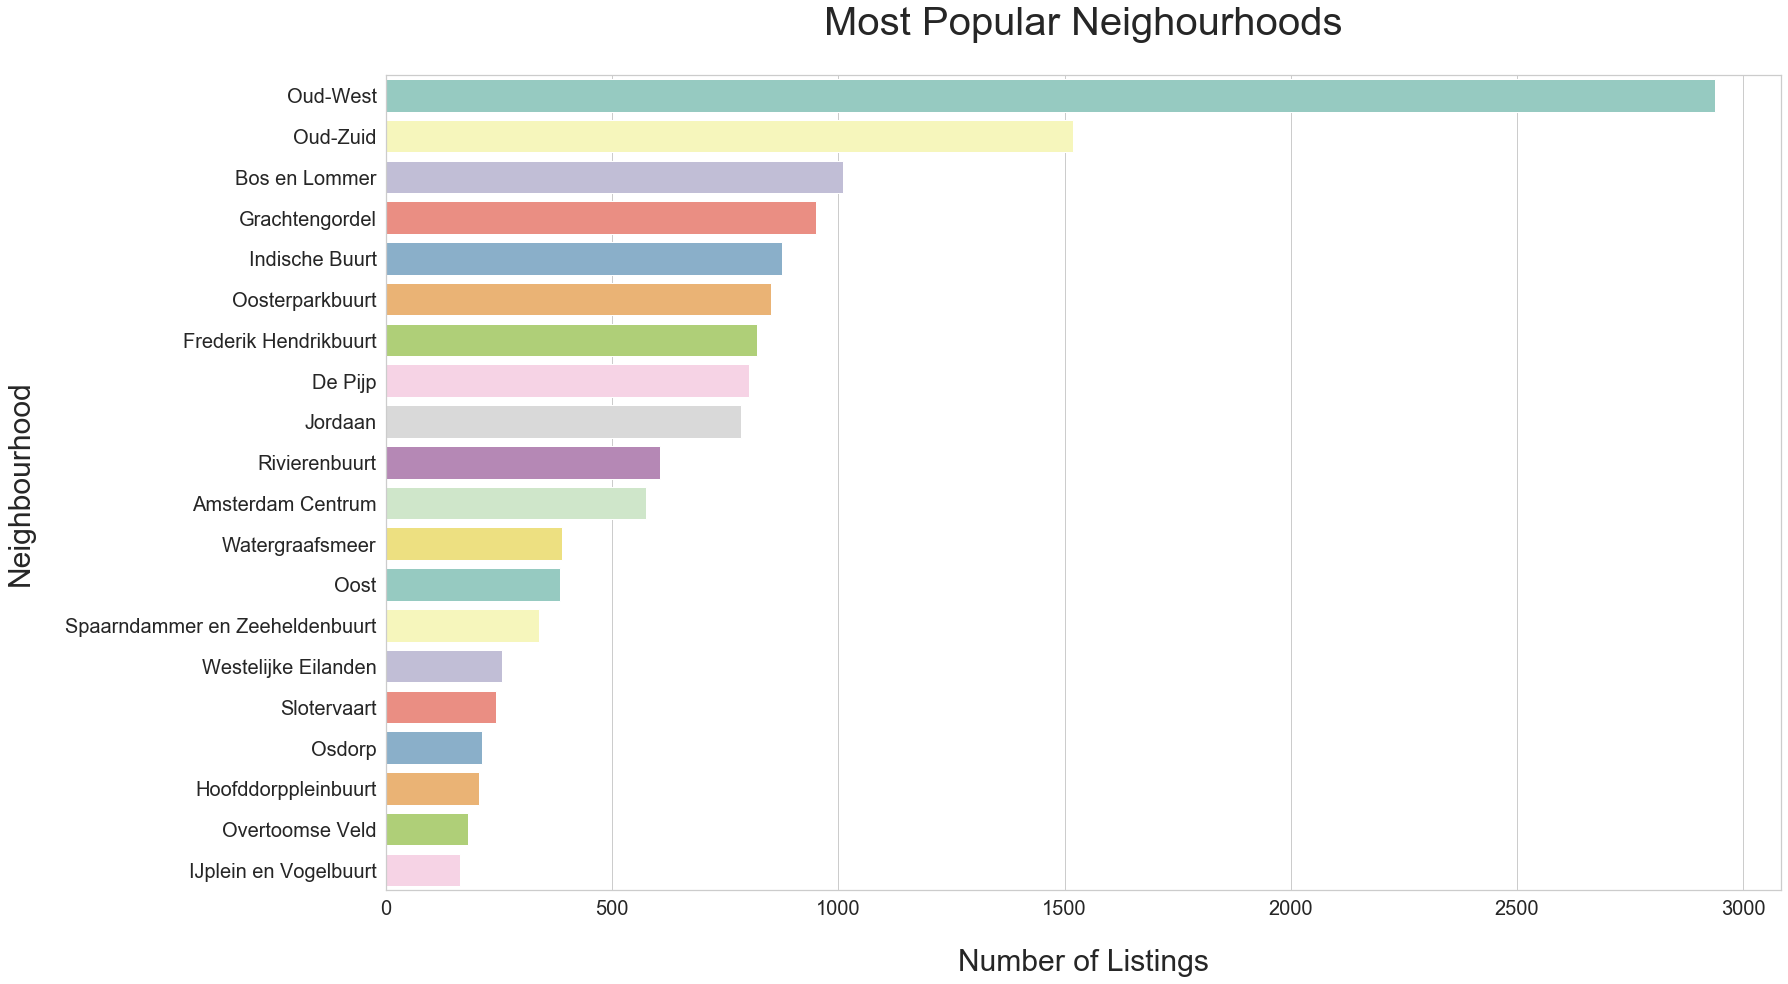

In [22]:
# Plot top 20 neighbourhoods in terms listings
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Most Popular Neighourhoods",fontsize=40,pad=40)
ax = sns.countplot(y='neighbourhood',data=listings, order = listings['neighbourhood'].value_counts().iloc[:20].index, palette="Set3")
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

## Data Exploration

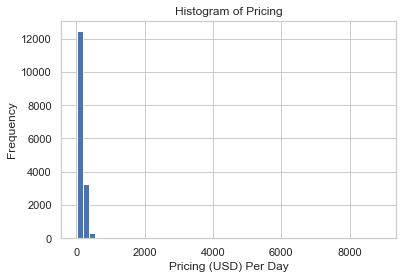

In [23]:
# visualize distribution of price (target variable)
plt.hist(listings['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

#### We see the distribution for pricing is strongly skewed right. This makes sense as a majority of the listings on Airbnb are single individual listings and Airbnb does strongly cater to travelers who are looking for cheaper places to stay for short durations of time. 



In [24]:
listings.head()

,id,neighbourhood,neighbourhood_cleansed,bedrooms,beds,bed_type,property_type,room_type,accommodates,price,...,availability_60,availability_90,availability_365,host_since,minimum_nights,cleaning_fee,number_of_reviews,amenities,review_scores_rating,cancellation_policy
0,2818,Indische Buurt,Oostelijk Havengebied - Indische Buurt,1.0,2.0,Real Bed,Apartment,Private room,2,59.0,...,18,43,89,2008-09-24,3,$60.00,267,"{Internet,Wifi,""Paid parking off premises"",""Bu...",98.0,strict_14_with_grace_period
1,20168,Grachtengordel,Centrum-Oost,1.0,1.0,Real Bed,Townhouse,Private room,2,80.0,...,8,34,124,2009-12-02,1,NaN,283,"{TV,Internet,Wifi,""Paid parking off premises"",...",88.0,strict_14_with_grace_period
2,25428,Grachtengordel,Centrum-West,1.0,1.0,Real Bed,Apartment,Entire home/apt,3,125.0,...,6,16,75,2009-11-20,14,$40.00,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",100.0,strict_14_with_grace_period
3,27886,Westelijke Eilanden,Centrum-West,1.0,1.0,Real Bed,Houseboat,Private room,2,150.0,...,13,26,66,2010-03-23,2,$0.00,195,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",99.0,strict_14_with_grace_period
4,28871,Amsterdam Centrum,Centrum-West,1.0,1.0,Real Bed,Apartment,Private room,2,75.0,...,5,12,138,2010-05-13,2,NaN,283,"{Internet,Wifi,""Pets live on this property"",Ca...",97.0,moderate


In [25]:
listings.property_type.value_counts()

Apartment                 12757
House                      1126
Townhouse                   477
Bed and breakfast           405
Loft                        318
Boat                        264
Condominium                 237
Houseboat                   226
Guest suite                 107
Aparthotel                   55
Serviced apartment           44
Boutique hotel               31
Guesthouse                   29
Other                        23
Hostel                       22
Hotel                        14
Villa                        12
Tiny house                    7
Cottage                       6
Cabin                         5
Bungalow                      3
Casa particular (Cuba)        2
Barn                          2
Camper/RV                     1
Tent                          1
Dome house                    1
Hut                           1
Castle                        1
Lighthouse                    1
Chalet                        1
Campsite                      1
Earth ho

#### Categorical variables will now be one-hot encoded. Categorical variables need to be One Hot Encoded in order to be converted into several numerical features and used in a Machine Learning model.

In [26]:
transformed_listings = pd.get_dummies(listings)

transformed_listings.head()

,id,bedrooms,beds,accommodates,price,weekly_price,monthly_price,availability_30,availability_60,availability_90,...,"amenities_{Wifi,Pool,Kitchen,Heating,""Family/kid friendly"",Washer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",Essentials,Shampoo,Hangers,Iron,""Laptop friendly workspace"",""Private living room"",""Baby monitor"",""Outlet covers"",""Baby bath"",""Changing table"",""High chair"",""Stair gates"",""Children’s books and toys"",""Table corner guards"",""Babysitter recommendations"",Crib,""Pack ’n Play/travel crib"",""Room-darkening shades"",""Children’s dinnerware"",""Hot water"",""Bed linens"",""Extra pillows and blankets"",Microwave,""Coffee maker"",Refrigerator,Dishwasher,""Dishes and silverware"",""Cooking basics"",Oven,Stove,""Patio or balcony"",Waterfront,""Paid parking on premises""}","amenities_{Wifi,Pool,Kitchen,Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Private entrance""}","amenities_{Wifi,Washer,""Smoke detector"",Essentials,Shampoo,""Hair dryer"",Iron}","amenities_{Wifi,Washer,""Smoke detector"",Essentials,Shampoo,Hangers,Iron,""Hot water"",""Bed linens"",""Host greets you""}",amenities_{},cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,2818,1.0,2.0,2,59.0,700.0,1500.0,8,18,43,...,0,0,0,0,0,0,0,1,0,0
1,20168,1.0,1.0,2,80.0,700.0,2200.0,0,8,34,...,0,0,0,0,0,0,0,1,0,0
2,25428,1.0,1.0,3,125.0,650.0,2000.0,4,6,16,...,0,0,0,0,0,0,0,1,0,0
3,27886,1.0,1.0,2,150.0,810.0,2500.0,6,13,26,...,0,0,0,0,0,0,0,1,0,0
4,28871,1.0,1.0,2,75.0,499.0,1956.0,2,5,12,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# Colinearity

def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the data frame. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = listings.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());
    
    

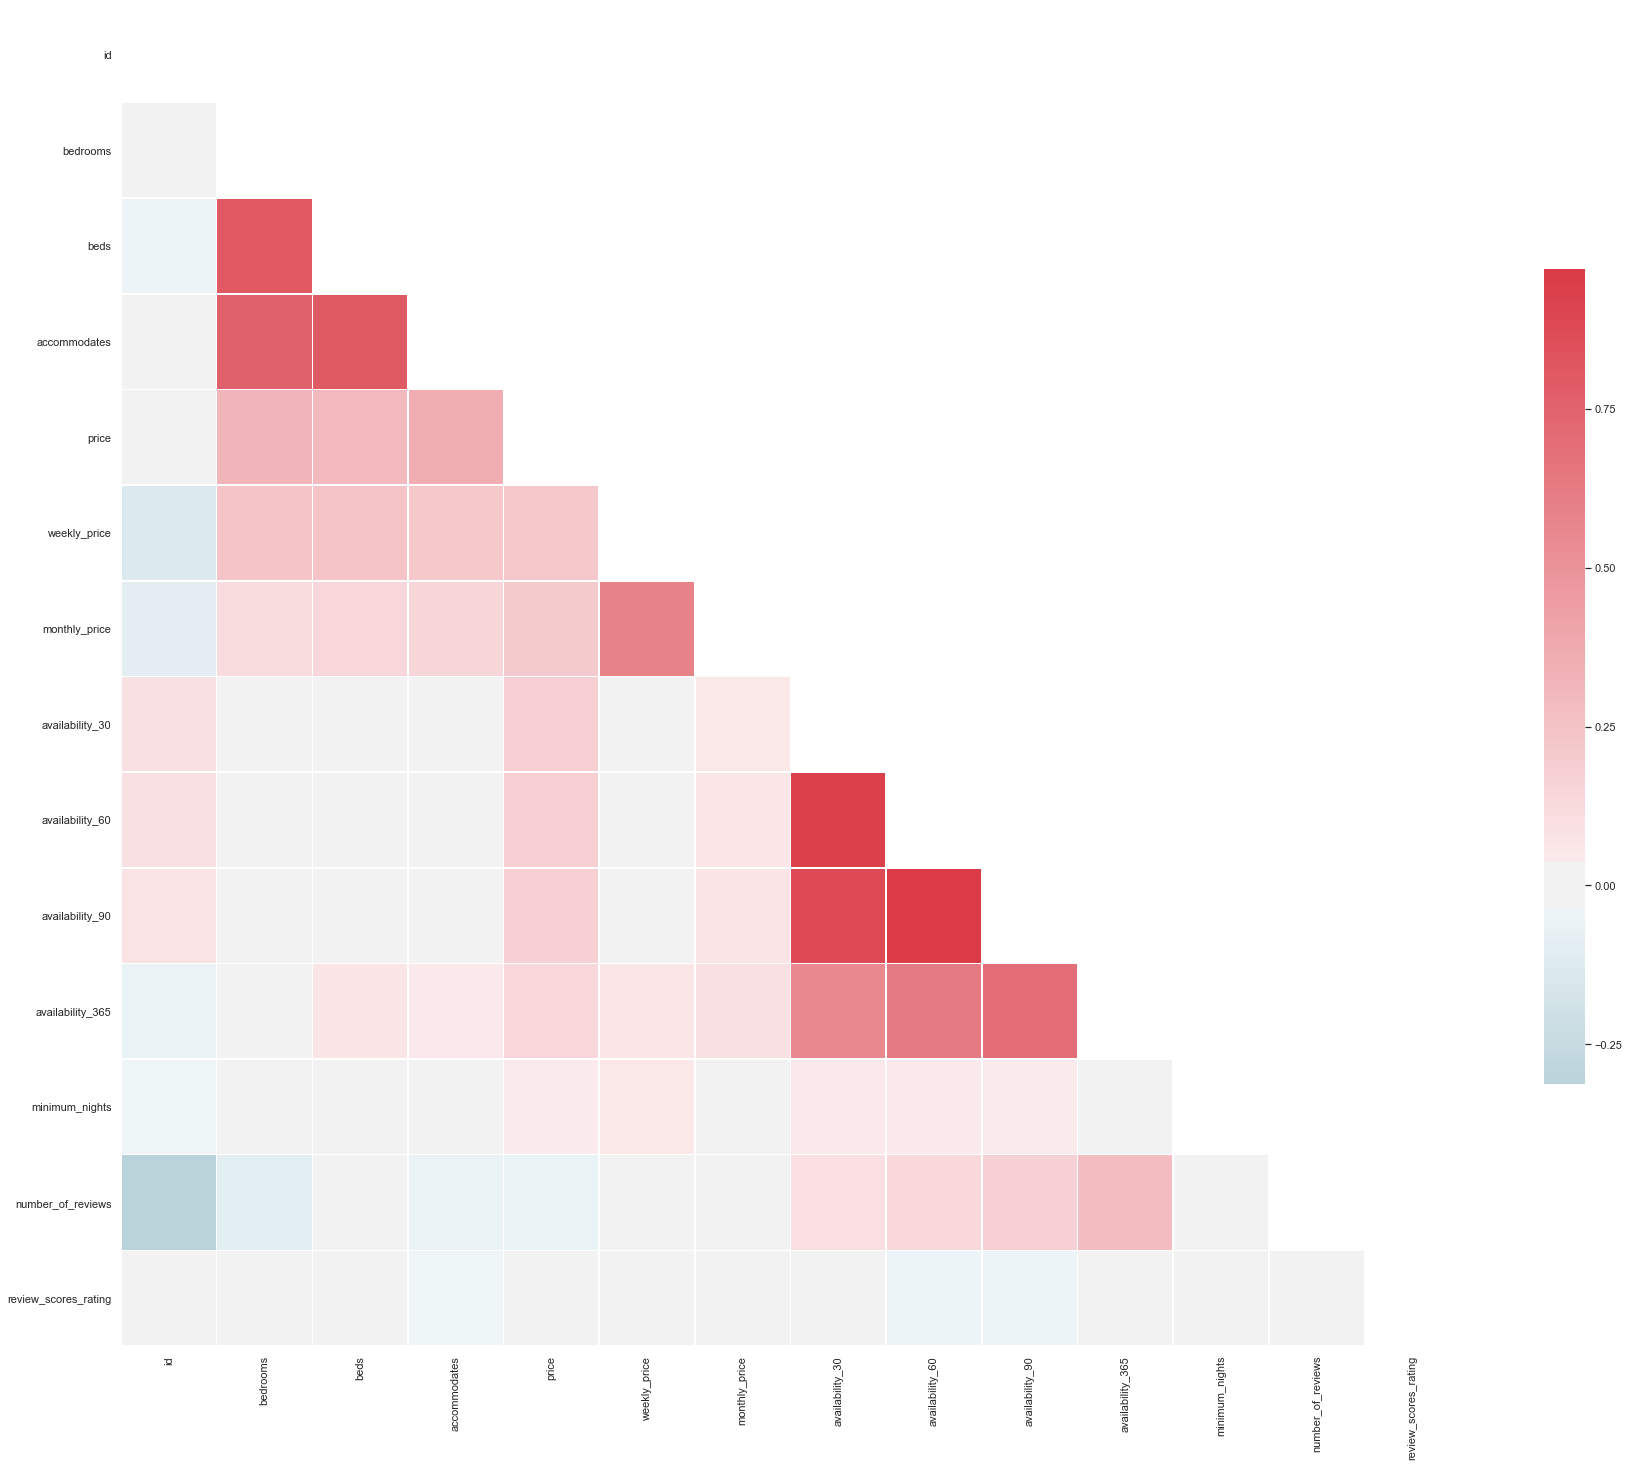

In [28]:
multi_collinearity_heatmap(transformed_listings, figsize=(30,30))

In [29]:
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data =listings.copy()
# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(temp_data.T)

corr_df = pd.DataFrame(data = corr_matrix, columns = temp_data.columns, 
             index = temp_data.columns)

corr_df

,id,neighbourhood,neighbourhood_cleansed,bedrooms,beds,bed_type,property_type,room_type,accommodates,price,...,availability_60,availability_90,availability_365,host_since,minimum_nights,cleaning_fee,number_of_reviews,amenities,review_scores_rating,cancellation_policy
id,1.000000,-0.017019,0.001235,-0.023791,-0.046429,0.050254,-0.003114,0.085132,-0.009964,0.003856,...,0.079944,0.070318,-0.079098,0.463047,-0.123860,-0.006677,-0.325937,0.534732,-0.012977,-0.110424
neighbourhood,-0.017019,1.000000,0.286091,0.072539,0.040529,-0.004767,0.072675,-0.041879,0.026634,-0.032164,...,-0.045823,-0.050743,-0.032455,-0.021260,0.006828,0.011985,-0.055857,-0.009178,0.027404,-0.000294
neighbourhood_cleansed,0.001235,0.286091,1.000000,0.064404,0.056144,-0.006866,0.028326,-0.047930,0.031660,-0.030529,...,-0.052365,-0.056535,-0.049648,-0.015875,0.001193,-0.004241,-0.067754,0.000407,0.024127,-0.013627
bedrooms,-0.023791,0.072539,0.064404,1.000000,0.801877,0.039650,0.288041,-0.216855,0.758018,0.305557,...,-0.045244,-0.046918,-0.004679,-0.028527,0.047382,0.232350,-0.112035,-0.080937,-0.005965,0.078160
beds,-0.046429,0.040529,0.056144,0.801877,1.000000,0.028300,0.240707,-0.120764,0.784654,0.274509,...,0.002444,0.010632,0.073721,-0.015572,0.030266,0.161643,-0.023611,-0.084910,-0.038401,0.089678
bed_type,0.050254,-0.004767,-0.006866,0.039650,0.028300,1.000000,0.019873,-0.063359,0.039169,0.027146,...,-0.002728,-0.004108,-0.019276,0.031499,-0.004403,0.035894,-0.035204,0.022186,0.004316,0.005028
property_type,-0.003114,0.072675,0.028326,0.288041,0.240707,0.019873,1.000000,0.078188,0.207614,0.107906,...,0.068214,0.079723,0.091801,0.005079,0.001279,0.041797,0.077653,-0.041512,0.036624,0.018463
room_type,0.085132,-0.041879,-0.047930,-0.216855,-0.120764,-0.063359,0.078188,1.000000,-0.214679,-0.149290,...,0.267561,0.302030,0.258384,0.082123,-0.099945,-0.309841,0.378385,0.088813,-0.048383,-0.046870
accommodates,-0.009964,0.026634,0.031660,0.758018,0.784654,0.039169,0.207614,-0.214679,1.000000,0.338133,...,0.011332,0.012787,0.049425,-0.008271,0.008814,0.234832,-0.059323,-0.063190,-0.057472,0.095098
price,0.003856,-0.032164,-0.030529,0.305557,0.274509,0.027146,0.107906,-0.149290,0.338133,1.000000,...,0.174451,0.166289,0.133777,-0.004647,0.075442,0.113716,-0.063724,-0.044607,0.016993,0.083991


#### It seems like price column has positive correlation with beds, bedroom, and accommodates but are not highly correlated (less than 0.50). I am not going to remove any columns for this analysis. 

In [30]:
listings.dtypes

id                          int64
neighbourhood              object
neighbourhood_cleansed     object
bedrooms                  float64
beds                      float64
bed_type                   object
property_type              object
room_type                  object
accommodates                int64
price                     float64
weekly_price              float64
monthly_price             float64
availability_30             int64
availability_60             int64
availability_90             int64
availability_365            int64
host_since                 object
minimum_nights              int64
cleaning_fee               object
number_of_reviews           int64
amenities                  object
review_scores_rating      float64
cancellation_policy        object
dtype: object

# Data Modeling

#### Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used. In this section several machine learning and deep learning models will be built in order to predict an Airbnb listing's price.




In [32]:
# Separate X and y 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = transformed_listings.drop('price', axis=1)
y = transformed_listings.price

# Saving feature names for later use
feature_list = list(X.columns)
features = np.array(X)



### Preparing data for training


In [33]:
# Split data into traning and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(len(X_train))
print(len(y_test))

12945
3237


## Random Forest Model

#### This is a regression task rather than a classification task. Accuracy is a nice metric for classification, but it doesn’t really make sense in the context of regression. Instead, we will use root mean square error (RMSE) to estimate how well our random forest was able to predict our test set outcomes.



In [34]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
#Train the algorithm
# n_estimators mean the number of trees in the forest. Lets start with 100 trees

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Evaluating the algorithm

In [36]:
#Evaluating the model for n_estimators=100

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 40.25037998146432
Mean Squared Error: 8087.4649912882305
Root Mean Squared Error: 89.93033409972539


#### The easier metric to understand is the mean absolute error, this means that our predictions were perfect but on average 40.25 away from the true prediction with the random forest model. 

 #### RMSE is the difference between model predictions and true values. We get the RMSE value about 90: which means this model is better to predict the airbnb price. We can create models with different hyperparameters tuning to try and boost performance. It took a long time to run the code in my laptop, so I just try n_estimaters=100.

### Important Features

In [42]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: amenities_{TV,"Cable TV",Wifi,Kitchen,Heating,Washer,Dryer} Importance: 0.19
Variable: amenities_{TV,"Cable TV",Internet,Wifi,Kitchen,"Smoking allowed","Pets allowed","Pets live on this property",Cat(s),"Indoor fireplace",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","Safety card",Essentials,"Host greets you"} Importance: 0.18
Variable: accommodates         Importance: 0.12
Variable: property_type_Lighthouse Importance: 0.04
Variable: cleaning_fee_$500.00 Importance: 0.04
Variable: amenities_{TV,"Cable TV",Internet,Wifi,"Air conditioning","Free parking on premises","Pets allowed",Elevator,"Free street parking","Hot tub",Heating,"Suitable for events","Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Lockbox,"Private entrance","Hot water","Bed linens","Extra pillows and blankets","Luggage dropoff allowed",Waterfront,"Lak

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Based on my random forest regtression model, we can see that the amenities and accommodates are top 2 important features to predict price. Which makes sence because these two features are important to determine the listing price.  

## Neural Network 

In [44]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

regr.predict(X_test[:2])

regr.score(X_test, y_test)

-11.648772578213073

#### The score return the coefficient of determination R^2 of the prediction. R square compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R square is negative. So, this is not a best fit model to predict the listing price. 


## Conclusion

#### In this project, I modelled Airbnb apartment prices using descriptive data from the airbnb. First, we preprocessed the data to remove any redundant features and reduce the sparsity of the data. Then we applied two different algorithms, initially with default parameters. In our results the Random Forest performed better than Neural Network.

#### The neural network model might give best result if we use Multi Layer Perceptron with default parameters. If I get a chance to do further  analysis in the  future, I will perform some others ML models such as XGBoost to compare the best fit model to predict listing price. I tried to use XGBoost, but I got error while importing XGBoost library in my MacOS.

#### To further improve our models, I could include more feature engineering, for example time-based features. 